# Pymaceuticals Inc.
---

### Analysis

- analysis
 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# setup DataFrames
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
mouse_study_df = study_results.merge(mouse_metadata, on="Mouse ID")
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Check number of unique mice.
number_of_mice = len(mouse_study_df["Mouse ID"].unique())
number_of_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# create a bool series to find duplicate rows
not_unique_mice_filter = mouse_study_df.duplicated(["Mouse ID", "Timepoint"], keep=False)
# show only the unique 'Mouse ID' after filtering the DataFrame to only duplicate rows
mouse_study_df[not_unique_mice_filter]["Mouse ID"].unique()

array(['g989'], dtype=object)

In [5]:
# Get all the data for the duplicate mouse ID.

duplicate_mouse = mouse_study_df[mouse_study_df["Mouse ID"] == "g989"]
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mouse_study_df = mouse_study_df[mouse_study_df["Mouse ID"] != "g989"].reset_index(drop=True)
clean_mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
# Number of mice in the clean DataFrame.
# should be 1 less than original unique mouse count
number_of_mice_clean = len(clean_mouse_study_df["Mouse ID"].unique())
number_of_mice_clean

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# use chained 'groupby' and 'agg' to create summary DataFrame
regimen_summary_df = clean_mouse_study_df.groupby("Drug Regimen")\
                                         .agg(Mean=("Tumor Volume (mm3)", "mean"),
                                              Median=("Tumor Volume (mm3)", "median"),
                                              Variance=("Tumor Volume (mm3)", "var"),
                                              Std_Dev=("Tumor Volume (mm3)", "std"),
                                              SEM=("Tumor Volume (mm3)", "sem"))
regimen_summary_df

,Mean,Median,Variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

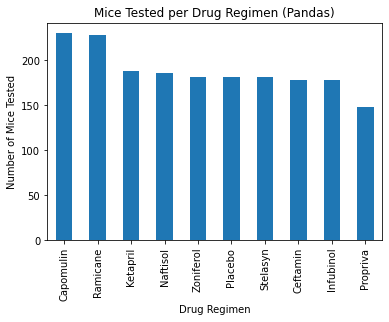

In [40]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

bar_chart_data = clean_mouse_study_df.groupby("Drug Regimen")\
                                     .agg({"Timepoint": "count"})\
                                     .rename(columns={"Timepoint": "Number of Mice Tested"})\
                                     .sort_values("Number of Mice Tested", ascending=False)
pands_bar_plot = bar_chart_data.plot(kind="bar", y="Number of Mice Tested", legend=False, title="Mice Tested per Drug Regimen (Pandas)")
# pandas 1.0.5 (PythonData) does not have `xlabel` and `ylabel` as part of .plot() kwargs, this is added in version 1.1.0
pands_bar_plot = pands_bar_plot.set(xlabel="Drug Regimen", ylabel="Number of Mice Tested")

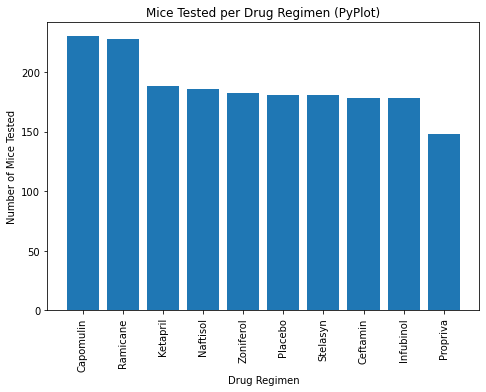

In [65]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

mpl_bar_plot = plt.figure(1)
ax_bar = mpl_bar_plot.add_axes([0, 0, 1, 1])
ax_bar.bar(bar_chart_data.index, bar_chart_data["Number of Mice Tested"])
ax_bar.set(xlabel="Drug Regimen", ylabel="Number of Mice Tested", title="Mice Tested per Drug Regimen (PyPlot)")
ax_bar.tick_params(axis='x', labelrotation=90)

# TODO how do I rotate and add labels from plt.bar directly
# mpl_bar_plot = plt.bar(bar_chart_data.index, bar_chart_data["Number of Mice Tested"])

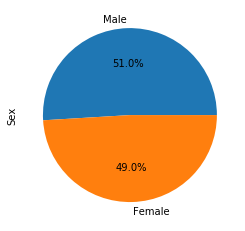

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



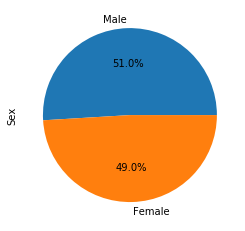

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


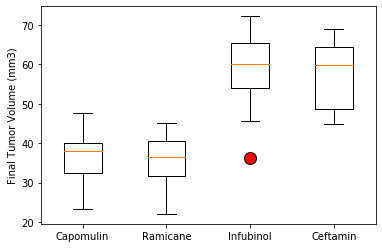

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

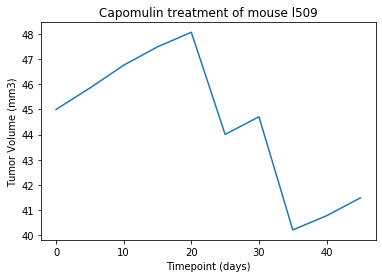

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



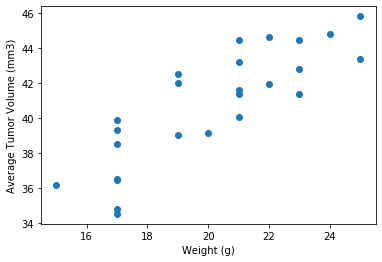

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


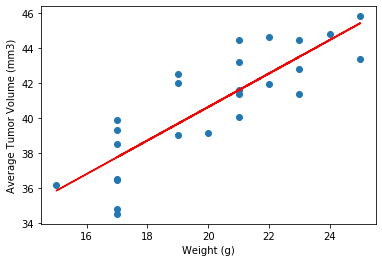

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

